In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.preprocessing import LabelEncoder

# Лабораторная работа №4

# 1. Загрузка данных датасета в переменную

In [2]:
data = pd.read_csv('JobSurveyIndia.csv')
data.head()

,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,0,Private Sector,Technical,No,Yes,4.0,More Than 1500K
1,1,Private Sector,Art,No,Yes,4.0,600K-900K
2,2,Government Sector,Technical,No,Yes,6.0,900K-1200K
3,3,Government Sector,Non-Technical,Yes,Yes,4.0,900K-1200K
4,4,Private Sector,Technical,No,Yes,5.0,1200K-1500K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             400 non-null    int64  
 1   Employment Sector      400 non-null    object 
 2   Employment Background  400 non-null    object 
 3   Public Dealing         400 non-null    object 
 4   Degree                 400 non-null    object 
 5   IdealNumberOfWorkdays  400 non-null    float64
 6   IdealYearlyIncome      400 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 22.0+ KB


In [4]:
data.drop(columns=['Unnamed: 0'], inplace=True)

# 2. Задача регрессии

# 3. Предобработка данных

Ниже будут объеденены пункты B и D в функции для выполнения кодирования категориальных переменных, а так же заполнения пустых значений.

### B. Проверка и заполнение пропусков. D. Кодирование категориальных переменных

- ##### Перевод из категориальных переменных в численные для удобства в дальнейшем
Создаются функции для замены категориальных значений в наборе данных, таких как Keys и Mode, на числовые значения. Keys преобразуются в соответствующие им частоты фортепианных клавиш, а Mode преобразуется с помощью метода One-Hot-Encoding (т. е. мажор = 1, минор = 0).

- ##### Обработка пустых значений
Нечисловые значения в наборе данных заменяются на NaN, а затем NaN и отсутствующие значения заменяются на медиану

- ##### Перевод в Int
Все столбцы атрибутов преобразованы к целочисленному типу данных для обеспечения единообразия

In [5]:
data.isnull().sum()

Employment Sector        0
Employment Background    0
Public Dealing           0
Degree                   0
IdealNumberOfWorkdays    0
IdealYearlyIncome        0
dtype: int64

В нашем случае пропусков не обнаружено

In [6]:
# Создаем экземпляр класса LabelEncoder
label_encoder = LabelEncoder()

# Кодируем переменные типа object
for column in data.select_dtypes(include='object'):
    data[column] = label_encoder.fit_transform(data[column])

print(data)

     Employment Sector  Employment Background  Public Dealing  Degree  \
0                    2                      3               0       1   
1                    2                      1               1       2   
2                    1                      3               0       1   
3                    1                      2               2       2   
4                    2                      3               0       1   
..                 ...                    ...             ...     ...   
395                  2                      2               1       2   
396                  1                      2               2       0   
397                  1                      2               2       0   
398                  1                      2               0       0   
399                  0                      2               2       0   

     IdealNumberOfWorkdays  IdealYearlyIncome  
0                      4.0                  3  
1                      4.0 

In [7]:
data['IdealNumberOfWorkdays'] = data['IdealNumberOfWorkdays'].astype('int32')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Employment Sector      400 non-null    int32
 1   Employment Background  400 non-null    int32
 2   Public Dealing         400 non-null    int32
 3   Degree                 400 non-null    int32
 4   IdealNumberOfWorkdays  400 non-null    int32
 5   IdealYearlyIncome      400 non-null    int32
dtypes: int32(6)
memory usage: 9.5 KB


In [9]:
data.head()

,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,2,3,0,1,4,3
1,2,1,1,2,4,1
2,1,3,0,1,6,2
3,1,2,2,2,4,2
4,2,3,0,1,5,0


### C. Нормирование численных переменных датасета

In [10]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = ['IdealYearlyIncome', 'IdealNumberOfWorkdays']

trans = MinMaxScaler()

data[numeric_columns] = trans.fit_transform(data[numeric_columns])

data[numeric_columns] = pd.DataFrame(data[numeric_columns])

data[numeric_columns].head()


,IdealYearlyIncome,IdealNumberOfWorkdays
0,1.000000,0.000000
1,0.333333,0.000000
2,0.666667,0.666667
3,0.666667,0.000000
4,0.000000,0.333333


### A. Разделение выборки на тестовую и тренировочную

In [11]:
data.describe()

,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000
mean,1.147500,2.010000,1.100000,0.85250,0.300833,0.501667
std,0.712047,0.906617,0.931219,0.79203,0.268663,0.352415
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,1.00000,0.333333,0.666667
75%,2.000000,3.000000,2.000000,1.25000,0.333333,0.666667
max,2.000000,3.000000,2.000000,2.00000,1.000000,1.000000


In [12]:
X = data.drop(columns=['IdealYearlyIncome'])
y = data['IdealYearlyIncome']

print(X.shape, y.shape)
print(X.head(), y.head())

(400, 5) (400,)
   Employment Sector  Employment Background  Public Dealing  Degree  \
0                  2                      3               0       1   
1                  2                      1               1       2   
2                  1                      3               0       1   
3                  1                      2               2       2   
4                  2                      3               0       1   

   IdealNumberOfWorkdays  
0               0.000000  
1               0.000000  
2               0.666667  
3               0.000000  
4               0.333333   0    1.000000
1    0.333333
2    0.666667
3    0.666667
4    0.000000
Name: IdealYearlyIncome, dtype: float64


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=17)

# 4. Dataset и Dataloader

In [14]:
from torch.utils.data import Dataset, DataLoader

In [15]:
class MyDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [17]:
# Создание объектов Dataset
train_dataset = MyDataset(X_train, y_train)
test_dataset = MyDataset(X_test, y_test)

# Создание объектов DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 5. Обучение модели на тренировочном множестве

In [18]:
import torch.nn as nn
import torch.optim as optim

In [19]:
# Функция потерь
criterion = nn.MSELoss()

# Количество эпох
epochs = 20

### А.Простая модель с оптимизатором

In [20]:
# Определение модели
model1 = nn.Linear(X_train.shape[1], 1)

# Определение оптимизатора
optimizer1 = optim.SGD(model1.parameters(), lr=0.001)

### B. Модель с 1 внешним слоем

In [21]:
# Определение модели
model2 = nn.Sequential(
    nn.Linear(X_train.shape[1], 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

# Определение оптимизатора
optimizer2 = optim.Adam(model2.parameters(), lr=0.001)

### C. Модель с 3+ слоями

In [22]:
# Определение модели
model3 = nn.Sequential(
    nn.Linear(X_train.shape[1], 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

# Определение оптимизатора
optimizer3 = optim.Adam(model3.parameters(), lr=0.001)

# 6. Подсчет loss на train и test выборках и графики

In [23]:
# Инициализация списков для сохранения потерь
train_losses1, test_losses1 = [], []
train_losses2, test_losses2 = [], []
train_losses3, test_losses3 = [], []


In [24]:
# Функция для расчета потерь
def calculate_loss(model, loader):
    total_loss = 0
    for inputs, targets in loader:
        outputs = model(inputs.float())
        loss = criterion(outputs, targets.float())
        total_loss += loss.item()
    return total_loss / len(loader)

In [25]:
# Расчет потерь для каждой эпохи
for epoch in range(epochs):
    for model, optimizer, train_losses, test_losses in [(model1, optimizer1, train_losses1, test_losses1), 
                                                        (model2, optimizer2, train_losses2, test_losses2), 
                                                        (model3, optimizer3, train_losses3, test_losses3)]:
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs.float())
            loss = criterion(outputs, targets.float())
            loss.backward()
            optimizer.step()

        train_loss = calculate_loss(model, train_loader)
        test_loss = calculate_loss(model, test_loader)
        train_losses.append(train_loss)
        test_losses.append(test_loss)

c:\Users\Арслан\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\Арслан\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


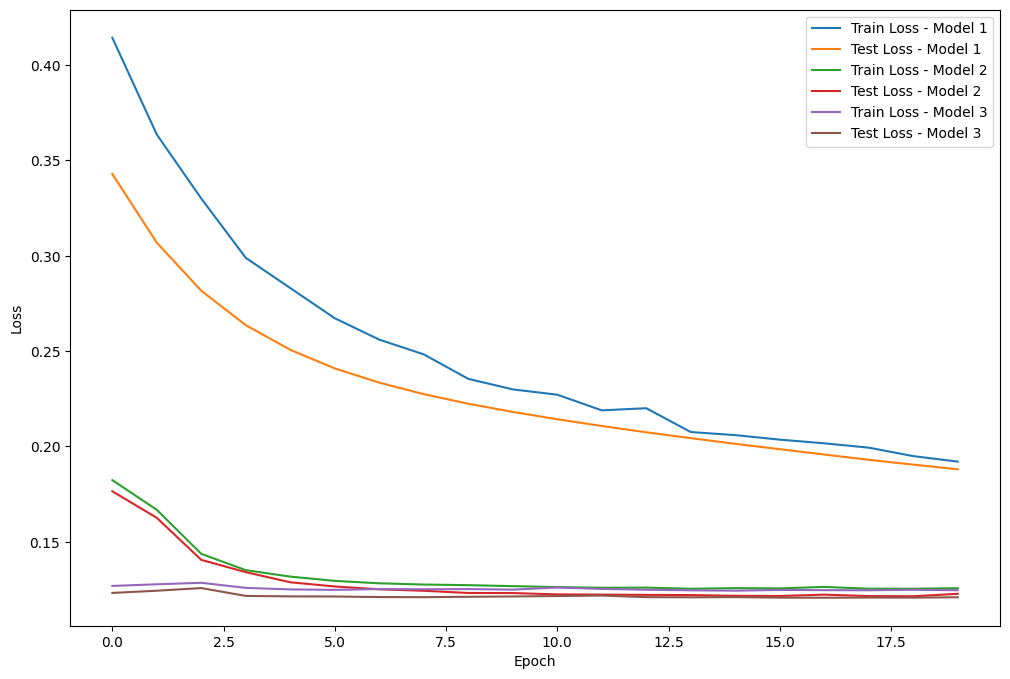

In [26]:
# Визуализация потерь
plt.figure(figsize=(12, 8))
plt.plot(train_losses1, label='Train Loss - Model 1')
plt.plot(test_losses1, label='Test Loss - Model 1')
plt.plot(train_losses2, label='Train Loss - Model 2')
plt.plot(test_losses2, label='Test Loss - Model 2')
plt.plot(train_losses3, label='Train Loss - Model 3')
plt.plot(test_losses3, label='Test Loss - Model 3')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 7. Подсчет метрик на train и test множествах для регресии(Mae)

In [27]:
import torch

for param in model1.parameters():
    print(param)

# Проверка на NaN в model1
if torch.isnan(model1(torch.zeros(1, X_train.shape[1]))).any():
    print("model1 содержит NaN значения")
else:
    print("model1 не содержит NaN значения")

if torch.isnan(model2(torch.zeros(1, X_train.shape[1]))).any():
    print("model2 содержит NaN значения")
else:
    print("model2 не содержит NaN значения")

# Проверка на NaN в model2
if torch.isnan(model3(torch.zeros(1, X_train.shape[1]))).any():
    print("model3 содержит NaN значения")
else:
    print("model3 не содержит NaN значения")


Parameter containing:
tensor([[ 0.1894,  0.1088, -0.1230, -0.1634, -0.0070]], requires_grad=True)
Parameter containing:
tensor([0.3143], requires_grad=True)
model1 не содержит NaN значения
model2 не содержит NaN значения
model3 не содержит NaN значения


In [28]:
from sklearn.metrics import mean_absolute_error

# Функция для расчета MAE
def calculate_mae(model, loader):
    total_mae = 0
    for inputs, targets in loader:
        outputs = model(inputs.float())
        mae = mean_absolute_error(outputs.detach().numpy(), targets.numpy())
        total_mae += mae
    return total_mae / len(loader)

# Расчет MAE для каждой модели на тренировочных и тестовых данных
train_mae1 = calculate_mae(model1, train_loader)
test_mae1 = calculate_mae(model1, test_loader)

train_mae2 = calculate_mae(model2, train_loader)
test_mae2 = calculate_mae(model2, test_loader)

train_mae3 = calculate_mae(model3, train_loader)
test_mae3 = calculate_mae(model3, test_loader)

# Вывод результатов
print(f'Модель 1 - Тренировочная MAE: {train_mae1}, Тестовая MAE: {test_mae1}')
print(f'Модель 2 - Тренировочная MAE: {train_mae2}, Тестовая MAE: {test_mae2}')
print(f'Модель 3 - Тренировочная MAE: {train_mae3}, Тестовая MAE: {test_mae3}')


Модель 1 - Тренировочная MAE: 0.32686207631292435, Тестовая MAE: 0.307881399213026
Модель 2 - Тренировочная MAE: 0.3160824391370019, Тестовая MAE: 0.302750787904693
Модель 3 - Тренировочная MAE: 0.3087867137355109, Тестовая MAE: 0.29938383110695416


# 8. Сравненеи метрик и выводы

In [30]:
# Сравнение метрик
mae_values = {'Model 1': [train_mae1, test_mae1],
              'Model 2': [train_mae2, test_mae2],
              'Model 3': [train_mae3, test_mae3]}

mae_df = pd.DataFrame(mae_values, index=['Train MAE', 'Test MAE'])
print(mae_df)

# Ответы на вопросы
best_model = mae_df.idxmin(axis=1)['Test MAE']
print(f'1. Лучше всего справилась модель: {best_model}')

overfitting = mae_df.loc['Train MAE'] < 0.15
print(f'2. Переобучение имеет место для следующих моделей: {overfitting[overfitting].index.tolist()}')

underfitting = abs(mae_df.loc['Train MAE'] - mae_df.loc['Test MAE']) > 0.15
print(f'3. Недообучение имеет место для следующих моделей: {underfitting[underfitting].index.tolist()}')

print('4. Для улучшения метрик моделей можно попробовать следующее:')
print('   - Изменить архитектуру модели (добавить больше слоев, изменить количество нейронов в слоях и т.д.)')
print('   - Использовать другую функцию потерь или оптимизатор')
print('   - Провести больше эпох обучения')
print('   - Использовать регуляризацию для предотвращения переобучения')
print('   - Провести предварительную обработку данных (нормализация, стандартизация, исключение выбросов и т.д.)')


            Model 1   Model 2   Model 3
Train MAE  0.326862  0.316082  0.308787
Test MAE   0.307881  0.302751  0.299384
1. Лучше всего справилась модель: Model 3
2. Переобучение имеет место для следующих моделей: []
3. Недообучение имеет место для следующих моделей: []
4. Для улучшения метрик моделей можно попробовать следующее:
   - Изменить архитектуру модели (добавить больше слоев, изменить количество нейронов в слоях и т.д.)
   - Использовать другую функцию потерь или оптимизатор
   - Провести больше эпох обучения
   - Использовать регуляризацию для предотвращения переобучения
   - Провести предварительную обработку данных (нормализация, стандартизация, исключение выбросов и т.д.)
